In [59]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [60]:
air_df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
air_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [61]:
air_df1=air_df.drop(['ID#','Award?'], axis=1)

air_df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [69]:
air_df1.isna().sum() #There is no null vaules in my data set 

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [62]:
from matplotlib import pyplot

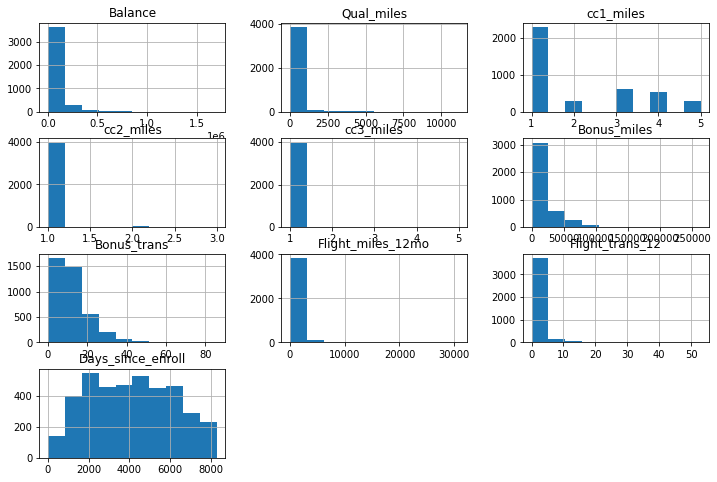

In [63]:
# histograms
air_df1.hist(figsize=(12, 8))
pyplot.show()

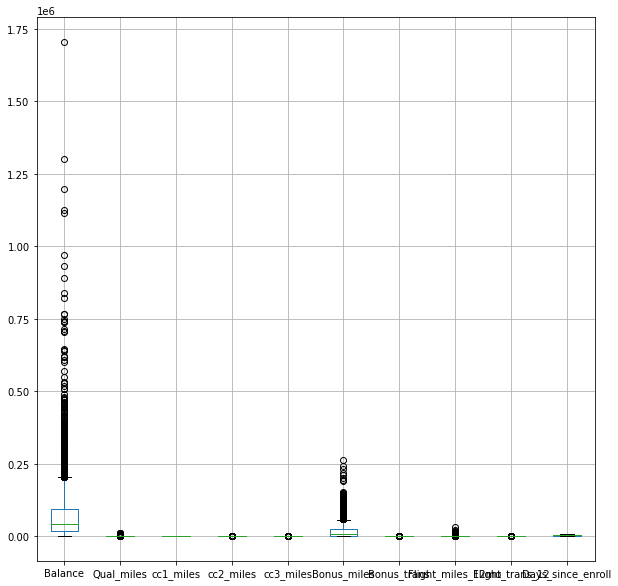

In [64]:
air_df1.boxplot(figsize=(10, 10))

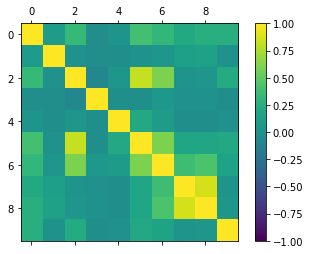

In [65]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(air_df1.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

 # Normalizing the data

In [66]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(air_df1.iloc[:,:]))
data 

,0,1,2,3,4,5,6,7,8,9
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [67]:
data.shape

(3999, 10)

# for creating dendrogram i am using all method and try to find out which method is best

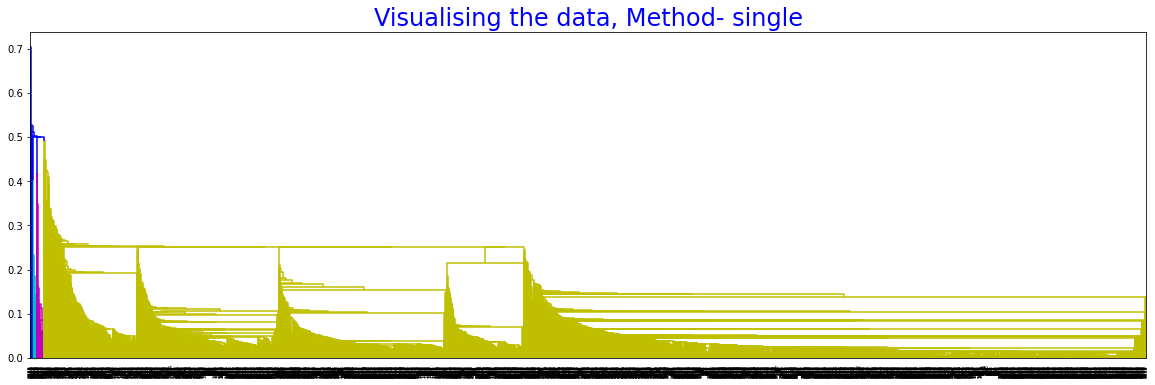

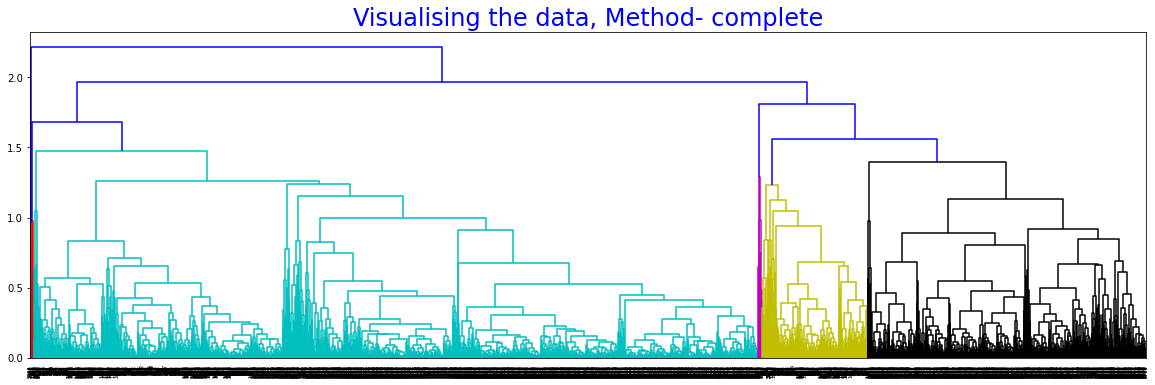

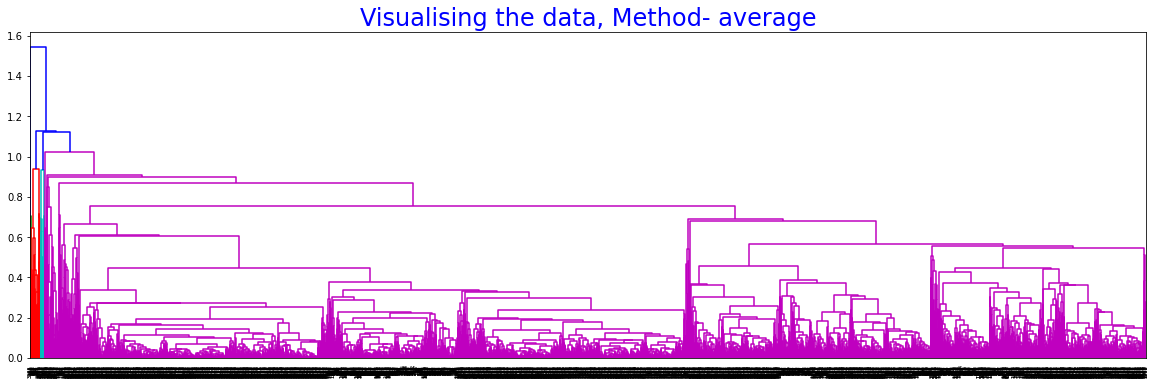

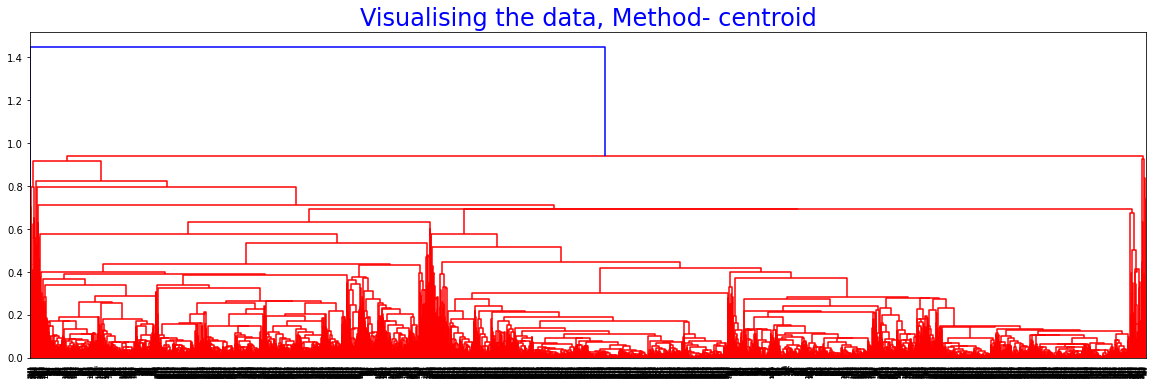

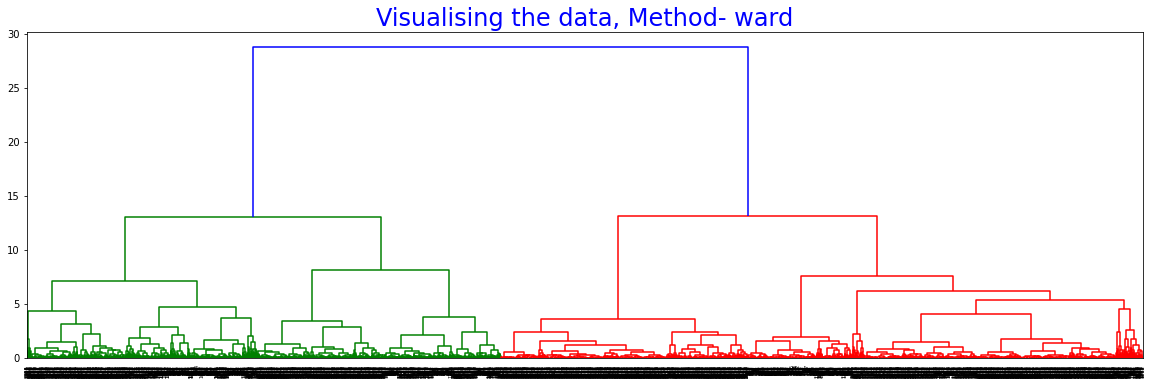

In [68]:
import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','centroid','ward']: 
   plt.figure(figsize =(20, 6)) 
   dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
   plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
   Dendrogram1 = shc.dendrogram(shc.linkage(data, method = methods,optimal_ordering=False))

**after all method ward is best method because cluster is more clear**

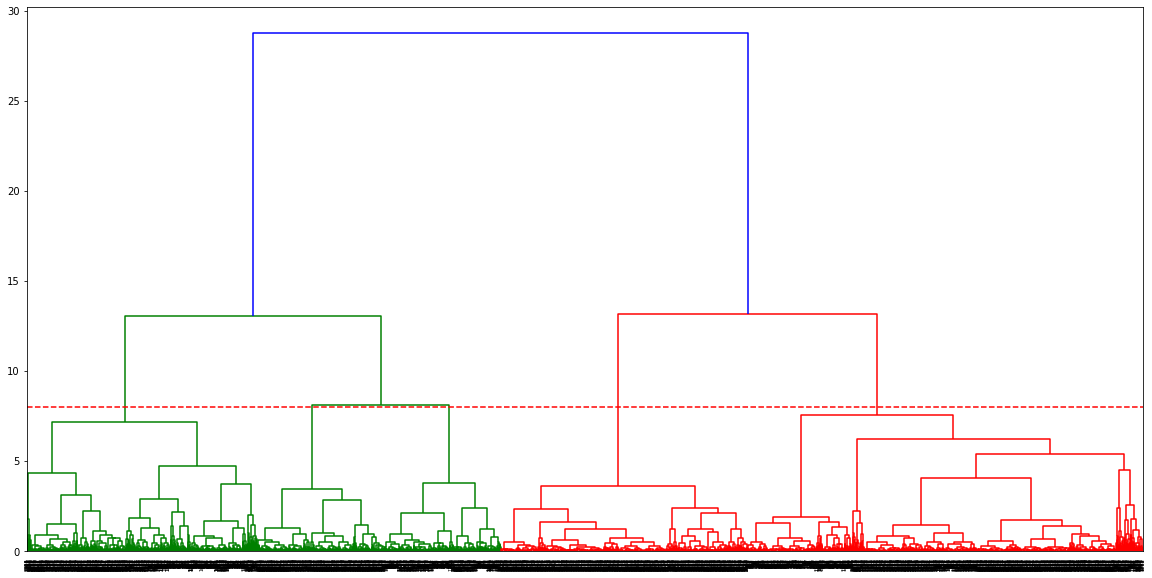

In [70]:

plt.figure(figsize=(20, 10))
Dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

In [75]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='ward',affinity = "euclidean").fit(data) 
y_hc = h_complete.fit_predict(data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,4
3997,2


In [77]:
air_df['cluster_id'] = h_complete.fit_predict(data)

In [78]:
air_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [79]:
air_df.groupby(['cluster_id']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_id,,,,,,,,,,,,
0,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416
1,825,825,825,825,825,825,825,825,825,825,825,825
2,885,885,885,885,885,885,885,885,885,885,885,885
3,415,415,415,415,415,415,415,415,415,415,415,415
4,458,458,458,458,458,458,458,458,458,458,458,458


In [80]:
import seaborn as sns

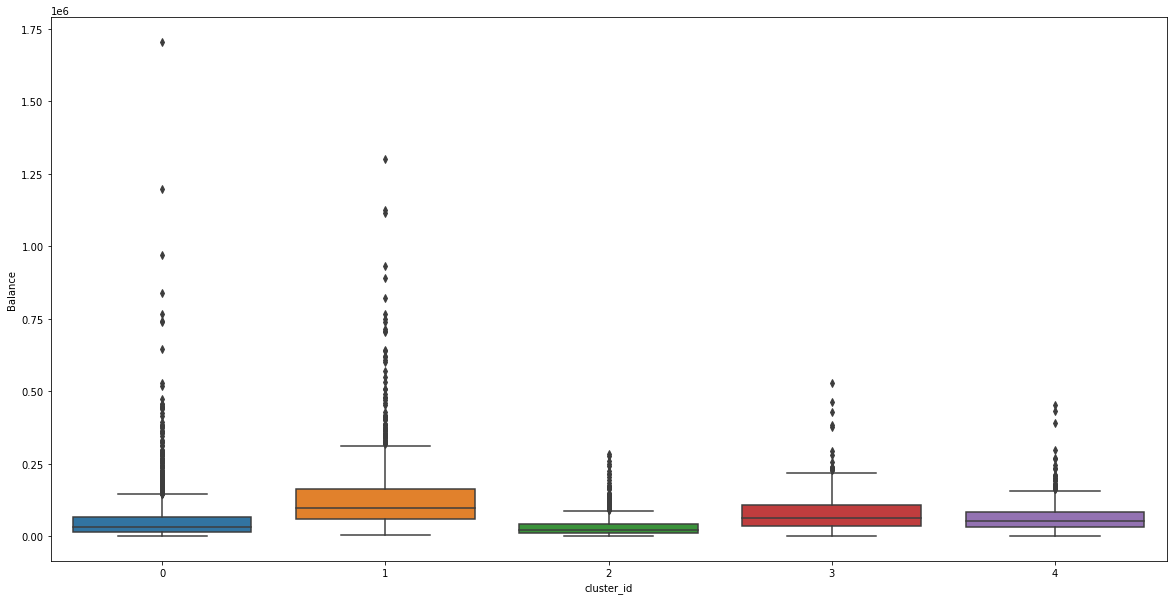

In [81]:

plt.figure(figsize=(20, 10))
sns.boxplot(x='cluster_id', y='Balance', data=air_df)
plt.show()

Text(0.5, 1.0, 'Clusters using hierarchical')

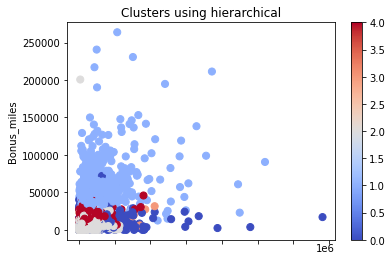

In [82]:
air_df.plot(x="Balance",y ="Bonus_miles",c=h_complete.fit_predict(data),kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using hierarchical') 

now we are doing Kmeans clusting to check no of cluster in the data set this airline data set is big only ward method is predict good cluster in hierarchical clusting. in other method cluster are not clear so we are trying to do kmean clustering

In [47]:
air_km=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
air_km.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [48]:
air_km1=air_km.drop(['ID#','Award?'], axis=1)

air_km1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


 # Normalizing the data

In [97]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data1 = pd.DataFrame(trans.fit_transform(air_km1.iloc[:,:]))
data1 

,0,1,2,3,4,5,6,7,8,9
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


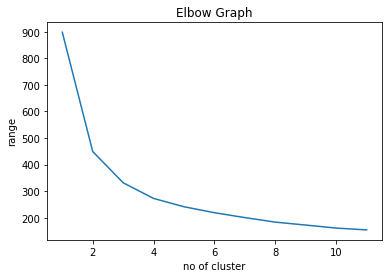

In [98]:
from sklearn.cluster import KMeans
list=[]
for i in range(1,12):
  kmean=KMeans(n_clusters=i,random_state=0)
  kmean.fit(data1)
  list.append(kmean.inertia_)

plt.plot(range(1,12),list)
plt.xlabel("no of cluster")
plt.ylabel('range')
plt.title("Elbow Graph")
plt.show()

In [99]:
kmean1=KMeans(n_clusters=4,random_state=42)
kmean1.fit(data)
kmean1.labels_


array([0, 0, 0, ..., 3, 2, 2], dtype=int32)

In [100]:
air_km['cluster_id1']=kmean1.labels_

In [101]:
air_km

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [102]:
air_km.groupby(['cluster_id1']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_id1,,,,,,,,,,,,
0,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
1,747,747,747,747,747,747,747,747,747,747,747,747
2,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
3,679,679,679,679,679,679,679,679,679,679,679,679


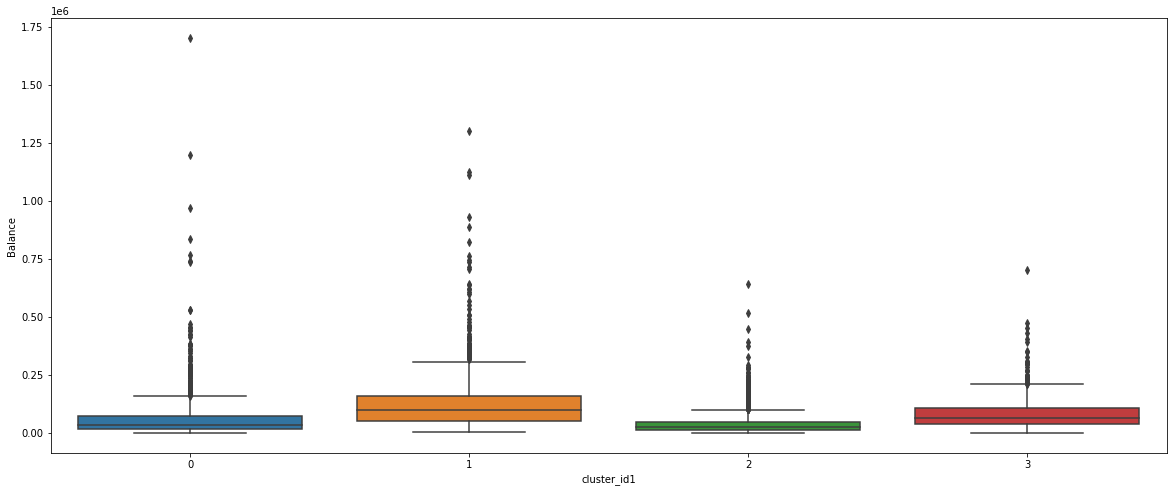

In [103]:
plt.figure(figsize=(20,8))
sns.boxplot(x='cluster_id1',y='Balance',data=air_km)
plt.show()

Text(0.5, 1.0, 'Clusters using KMeans')

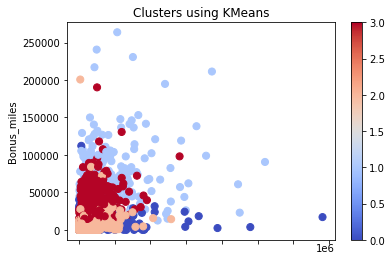

In [104]:
air_km.plot(x="Balance",y ="Bonus_miles",c=kmean1.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 


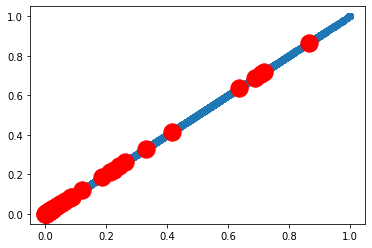

In [105]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data1)
plt.scatter(data1[0:], data1[0:])
plt.scatter(kmeans.cluster_centers_[0:], kmeans.cluster_centers_[0:], s=300, c='red')
plt.show()

In [27]:
from sklearn.cluster import DBSCAN

In [30]:
air_db=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
air_db.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [31]:
air_db1=air_db.drop(['ID#','Award?'], axis=1)

air_db1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


 # Normalizing the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2=scaler.fit_transform(air_db1.iloc[:,:])
data2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [33]:

dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(data2)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [36]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,0
3997,0


In [45]:
air_db_f = pd.concat([air_db,cl],axis=1)

In [46]:
air_db_f.head(200)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,199,134601,0,1,1,1,0,0,0,0,7493,0,0
196,200,32742,0,5,1,1,61857,26,0,0,7488,1,-1
197,201,108341,0,3,1,1,19670,21,0,0,7488,0,0
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,-1


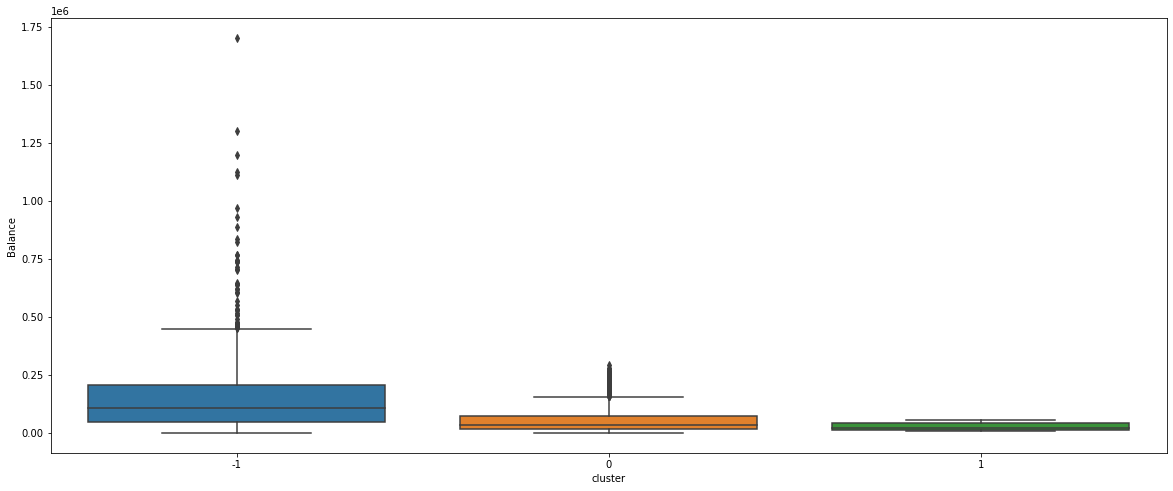

In [72]:
plt.figure(figsize=(20,8))
sns.boxplot(x='cluster',y='Balance',data=air_db_f)
plt.show()

Dbscan method is not good for airline data there are so many outlier in data set

In [ ]:
best method for airline data is kmean clusting 

In [83]:
air_df.groupby(['cluster_id']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_id,,,,,,,,,,,,
0,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416
1,825,825,825,825,825,825,825,825,825,825,825,825
2,885,885,885,885,885,885,885,885,885,885,885,885
3,415,415,415,415,415,415,415,415,415,415,415,415
4,458,458,458,458,458,458,458,458,458,458,458,458


In [107]:
air_km.groupby(['cluster_id1']).count()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster_id1,,,,,,,,,,,,
0,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
1,747,747,747,747,747,747,747,747,747,747,747,747
2,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
3,679,679,679,679,679,679,679,679,679,679,679,679


Text(0.5, 1.0, 'Clusters using hierarchical')

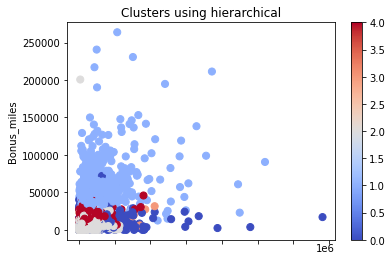

In [94]:
air_df.plot(x="Balance",y ="Bonus_miles",c=h_complete.fit_predict(data),kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using hierarchical') 

Text(0.5, 1.0, 'Clusters using KMeans')

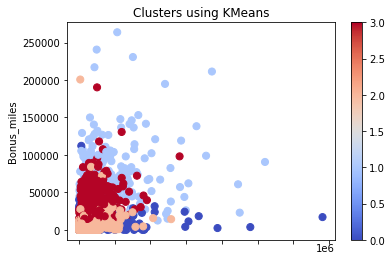

In [106]:
air_km.plot(x="Balance",y ="Bonus_miles",c=kmean1.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

we try so many method in hierarchical clusting and only ward method is good
if we talk kmean and hierarchical clusting in kmean there is 4 cluster and hierarchical clusting 5 cluster.cluster is  more clesar in kmean cluster.

DBSCAN is not good for this data set there is so many noise data